In [1]:
import torch
import matplotlib.pyplot as plt
from optim.schedules.sched import *

In [2]:
csched = ConstSched(0.001)
exp_sched = ExpAnnealingSched(0.0025, 0.9, 1e-6)
wr_exp_sched = WarmRestarter(100, 0.2, ExpAnnealingSched(0.0025, 0.925, 1e-6))
cos_sched = CosAnnealingSched(0.0001, 200, cycles=0.5,min_val=1e-7)
wr_cos_sched = WarmRestarter( 50, 0.5, CosAnnealingSched(0.025, 80, -math.pi/4, 0.625,  1e-6))
lin_sched = LinSched(0.1, 0.0001, 50)
wr_lin_sched = WarmRestarter(75, 0.5, LinSched(0.1, 0.001, 50))
scheds = [csched, 
          exp_sched, wr_exp_sched, 
          cos_sched, wr_cos_sched, 
          lin_sched, wr_lin_sched]
snames = ["Constant", 
          "Exp Annealing", "WR Exp Annealing", 
          "Cos Annealing", "WR Cos Annealing",
          "Lin Annealing", "WR Lin Annealing"]


/net/flood/home/theloni/audio-rc-rtl/exploration/optim/schedules/sched.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._init_val = torch.tensor(init_val)
/net/flood/home/theloni/audio-rc-rtl/exploration/optim/schedules/sched.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._val, self._min, self._max, self._tau = map(torch.tensor, (init_val, min_val, max_val, time_const))


In [3]:
vals = []
for _ in range(250):
    vals.append(torch.cat(tuple(sched.step().unsqueeze(0) for sched in scheds)))
seqs = torch.stack(vals).T.numpy()

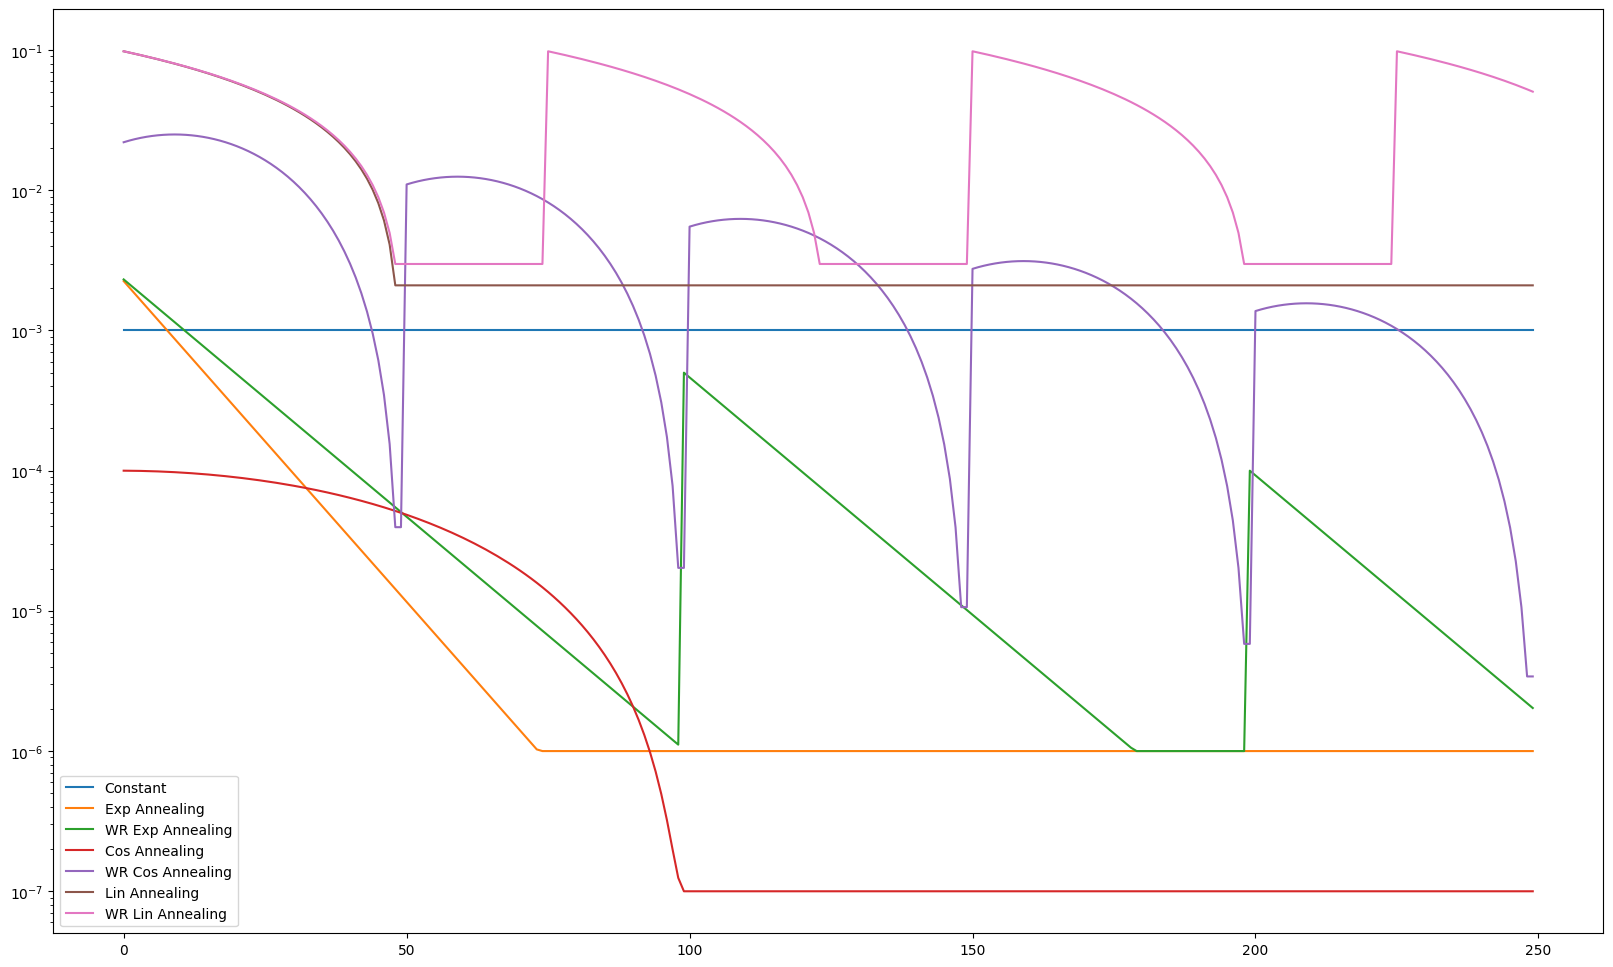

In [5]:
plt.figure(figsize=(20, 12))
for i, seq in enumerate(seqs):
    plt.plot(seq, label=snames[i])
plt.yscale("log")
plt.legend()